In [13]:
import pandas as pd 
import numpy as np
import os
import pylab as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)

os.chdir("../dataFrames")
df = pd.read_csv('finalView.csv',  index_col=0)

In [11]:
df_new=df.drop(columns=["R_fighter","B_fighter","Referee","date","location","Winner","title_bout","weight_class","B_Stance","R_Stance"])
#pd.set_option('display.max_rows', 999)
pca_new = decomposition.PCA(n_components=2)
X_pca_new = pca_new.fit_transform(df_new)
#X_pca_new

principalDf = pd.DataFrame(data = X_pca_new
             , columns = ['principal component 1', 'principal component 2'])


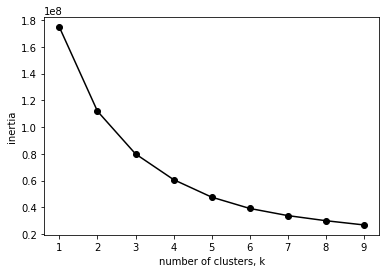

In [14]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalDf.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()